<a href="https://colab.research.google.com/github/MohammadAliAfsahi/Machine-Learning-and-Deep-Learning/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.datasets import load_iris
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [0]:
np.random.seed(42)

In [0]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [0]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
export_graphviz(tree_clf, out_file=("./iris_tree.dot"),feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

In [0]:
!dot -Tpng iris_tree.dot -o iris_tree.png # converts .dot file given from last line to .png

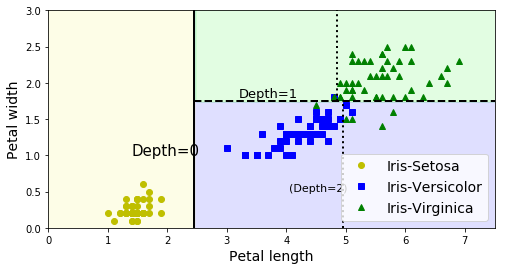

In [0]:
def plot_decision_boundary(model_clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
  
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  
  x1, x2 = np.meshgrid(x1s, x2s)
  
  X_new = np.c_[x1.ravel(), x2.ravel()]
  
  y_pred = model_clf.predict(X_new).reshape(x1.shape)
  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  
  if plot_training:
      plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
      plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
      plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
      plt.axis(axes)
      
  if iris:
      plt.xlabel("Petal length", fontsize=14)
      plt.ylabel("Petal width", fontsize=14)
  else:
      plt.xlabel(r"$x_1$", fontsize=18)
      plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  
  if legend:
      plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [0]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [0]:
tree_clf.predict([[5, 1.5]])

array([1])

***CART algorithm cost function***
\begin{align}
J(k, t_k) = \frac{m_left}{m}G_{left} + \frac{m_right}{m}G_{right} \ \\ \\
where 
\begin{cases}
G_{left / right} \ \ \ measures \ the \ impurity \ of \ the \ left / right \ subset, \ \\ \\
m_{left / right} \ \ \ \ is \ the \ number \ of \ instances \ in \ the \  left / right \ subset
\end{cases}
\end{align}

***Gini Impurity comes from:***
\begin{align}
G_i & = 1 - \sum_{k=1}^n  \ p_{i, k}^ \ 2
\end{align}

***Entropy: a set's entropy is zero when it contains instances of only one class***
\begin{align}
H_i & = - \ \ \sum_{k=1}^n \ \ p_{i,k} \log(p_{i,k}) \ \ \ \ \ \ \ \ \ \ \ where \ \ \ \   p_{i,k} \neq 0 
\end{align}

# ***Decision Trees regressor***

In [0]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

***CART cost function*** 
\begin{align}
J( k , t_k) & = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right} \ \\
where \ 
\begin{cases}
MSE_{node} = \sum_{ i∈ node} ( \hat{y} - y^{(i)})^2  \ \\ \\
\hat{y} = \frac{1}{m_{node}}  \sum_{i ∈ node} y^{(i)}
\end{cases}
\end{align}

In [0]:
np.random.seed(42)

m = 200

X_rnd = np.random.rand(m, 1)

y_rnd = 4 * (X_rnd - 0.5) **2

y_rnd = y_rnd + np.random.randn(m, 1) / 10

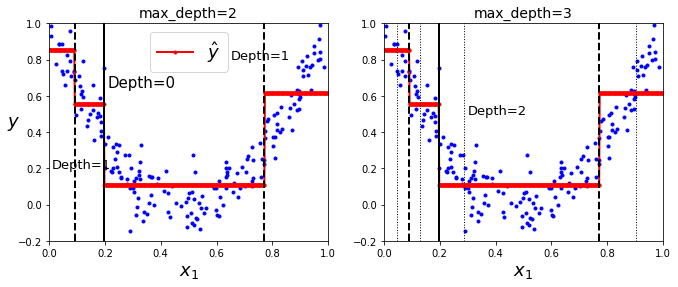

In [0]:
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg2.fit(X_rnd, y_rnd)
tree_reg3.fit(X_rnd, y_rnd)


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg2, X_rnd, y_rnd)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg3, X_rnd, y_rnd, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()